Housing Price Analysis

we will perform analysis of housing prices using the Kaggle Melbourne Housing Market dataset
https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/code


Research Question
What are the most important features affecting house prices

In [1]:
!pip install datasist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from datasist.structdata import detect_outliers

from scipy import stats

from scipy.stats import skew, kurtosis, probplot



%matplotlib inline
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.3)
pd.set_option('mode.chained_assignment', None)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


1. Data Loading

In [2]:
df = pd.read_csv('/content/Melbourne_housing_FULL.csv')

df.head(5)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

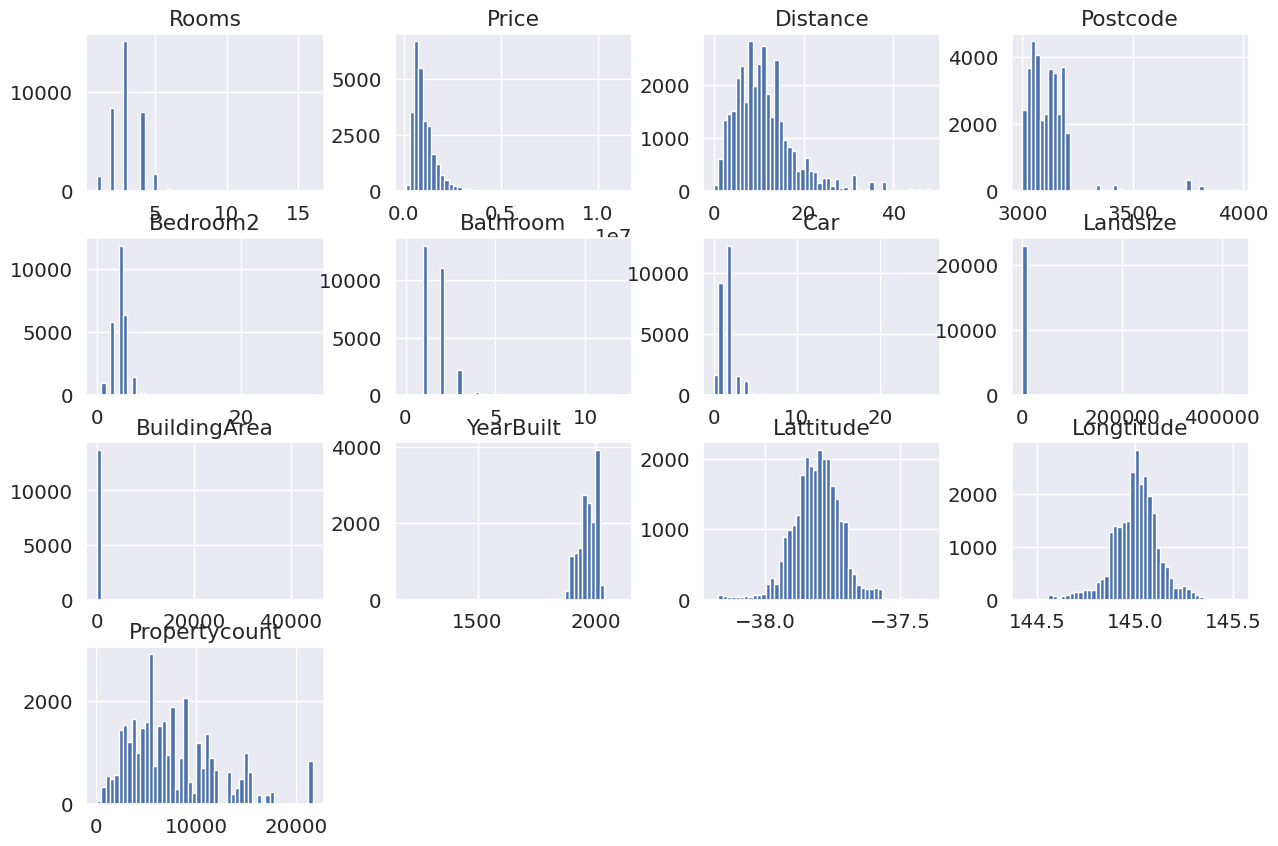

In [4]:

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

categorical_cols = df.select_dtypes(include=['object']).columns

df[numerical_cols].hist(bins=50 , figsize=(15,10))


plt.show()



## **2.  Clean and prepare the data**

## Duplicates


In [5]:
df.duplicated().sum()


np.int64(1)

In [6]:
df.drop_duplicates(inplace = True, keep = "first")
df.duplicated().sum()

np.int64(0)

In [7]:
# Check for non-integer values in the following columns

columns_to_check = ['Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Propertycount']
for col in columns_to_check:
    non_integer = df[col].dropna().mod(1).ne(0).any()
    print(f"{col} has non-integer values: {non_integer}")

Bedroom2 has non-integer values: False
Bathroom has non-integer values: False
Car has non-integer values: False
YearBuilt has non-integer values: False
Propertycount has non-integer values: False


In [8]:
#convert non-integer values to int64

for col in columns_to_check:
    if not df[col].dropna().mod(1).ne(0).any():
        df[col] = df[col].astype('Int64')

In [9]:
# convert postcode to int64

df['Postcode'] = df['Postcode'].astype('Int64')

In [10]:
#Convert Date to datetime64

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [11]:
df_clean = df.copy()

numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns


In [12]:
print(df_clean.dtypes)


Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                  Int64
Bedroom2                  Int64
Bathroom                  Int64
Car                       Int64
Landsize                float64
BuildingArea            float64
YearBuilt                 Int64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount             Int64
dtype: object


## Missing Value

In [13]:
df_clean.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,7609
Method,0
SellerG,0
Date,0
Distance,1
Postcode,1


In [14]:
# Create missing data table

missing_values = df_clean.isnull().sum()

missing_percentages = 100 * df_clean.isnull().sum() / len(df_clean)


missing_data_table = pd.concat([missing_values, missing_percentages],
                               axis=1,
                                keys=['Missing Values', 'Percentage'])


print('Missing Data table:')
missing_data_table[missing_data_table['Missing Values'] > 0]







Missing Data table:


,Missing Values,Percentage
Price,7609,21.829814
Distance,1,0.002869
Postcode,1,0.002869
Bedroom2,8217,23.574134
Bathroom,8226,23.599954
Car,8728,25.040165
Landsize,11810,33.882258
BuildingArea,21115,60.577806
YearBuilt,19306,55.387882
CouncilArea,3,0.008607


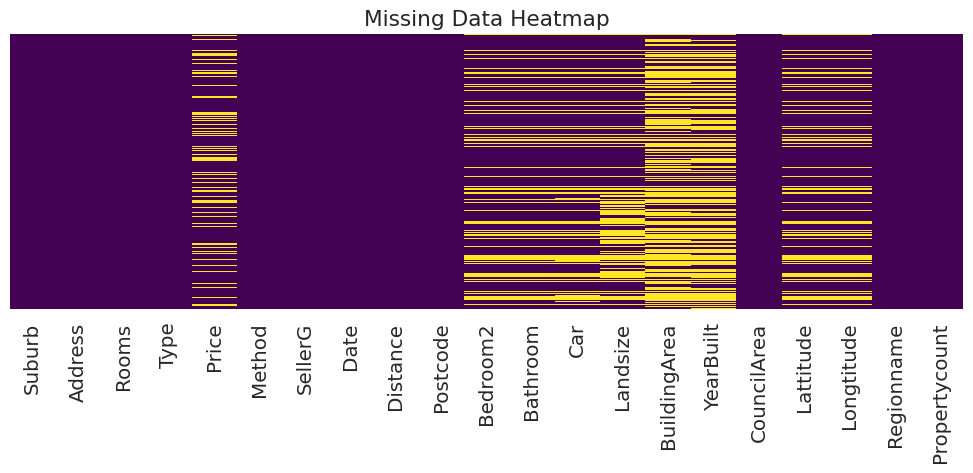

In [15]:
sns.heatmap(df_clean.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()



In [16]:
df_clean = df.dropna()

In [17]:
df_clean.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


## Outliers

In [18]:
df_clean.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887,8887.000000,8887.0,8887.0,8887.0,8887.0,8887.000000,8887.000000,8887.0,8887.000000,8887.000000,8887.0
mean,3.098909,1.092902e+06,2017-04-05 23:17:42.540790016,11.199887,3111.662653,3.078204,1.64645,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
min,1.000000,1.310000e+05,2016-02-04 00:00:00,0.000000,3000.0,0.0,1.0,0.0,0.000000,0.000000,1196.0,-38.174360,144.423790,249.0
25%,2.000000,6.410000e+05,2016-09-24 00:00:00,6.400000,3044.0,2.0,1.0,1.0,212.000000,100.000000,1945.0,-37.858560,144.920000,4382.5
50%,3.000000,9.000000e+05,2017-05-13 00:00:00,10.200000,3084.0,3.0,2.0,2.0,478.000000,132.000000,1970.0,-37.798700,144.998500,6567.0
75%,4.000000,1.345000e+06,2017-09-16 00:00:00,13.900000,3150.0,4.0,2.0,2.0,652.000000,180.000000,2000.0,-37.748945,145.064560,10331.0
max,12.000000,9.000000e+06,2018-03-17 00:00:00,47.400000,3977.0,12.0,9.0,10.0,42800.000000,3112.000000,2019.0,-37.407200,145.526350,21650.0
std,0.963786,6.793819e+05,NaN,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364


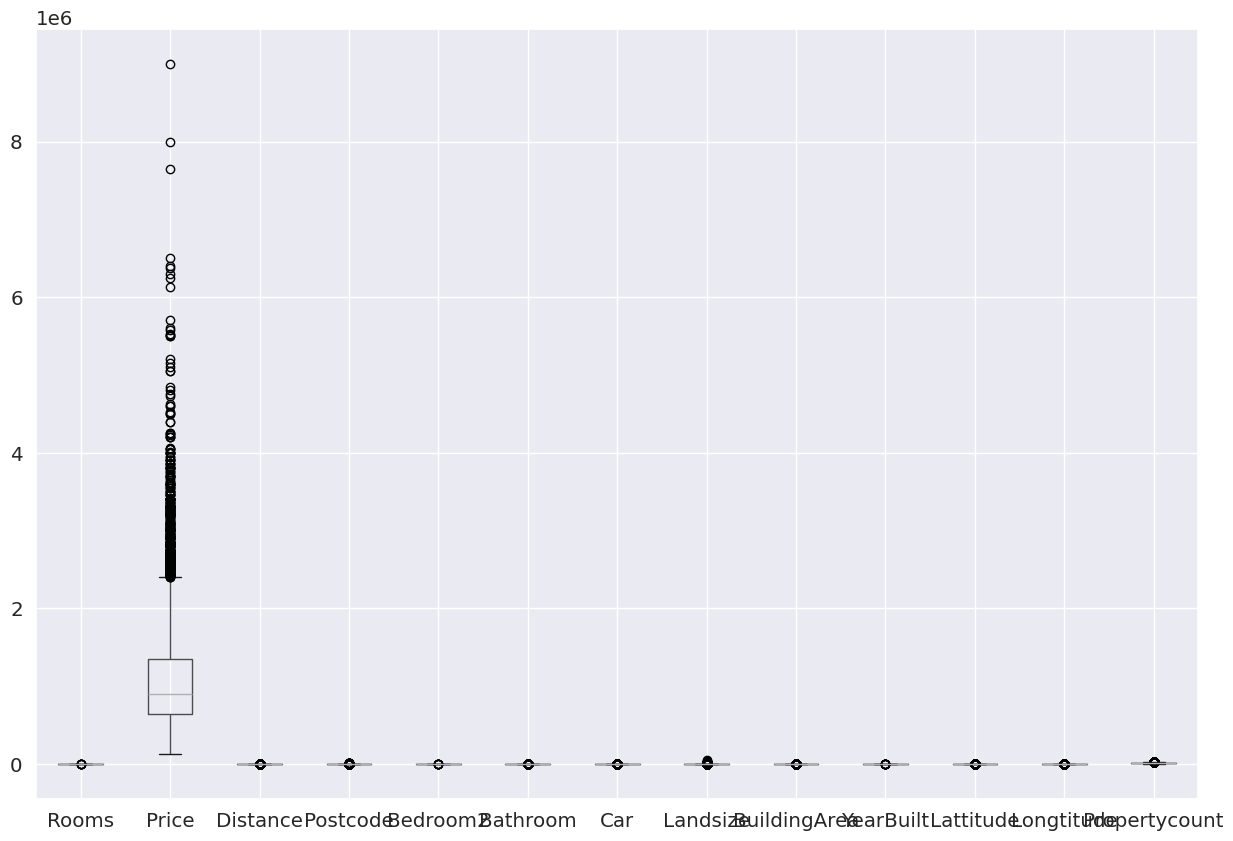

In [19]:
# Boxplots for numerical columns to check outliers

numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

df_clean[numerical_cols].boxplot( figsize=(15, 10))
plt.show()


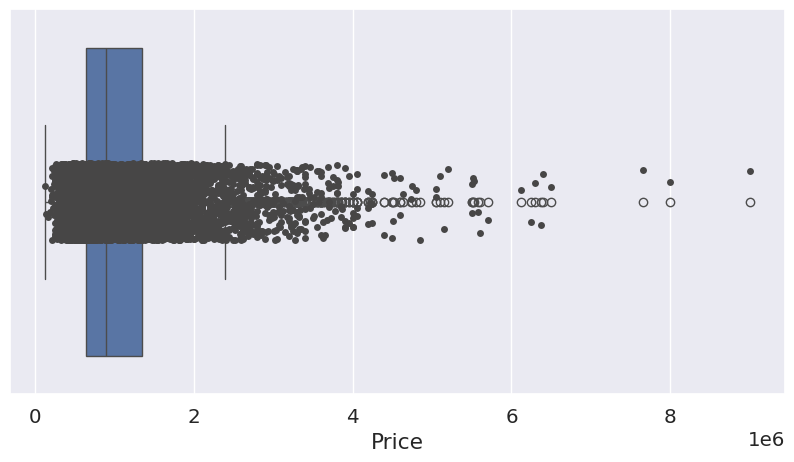

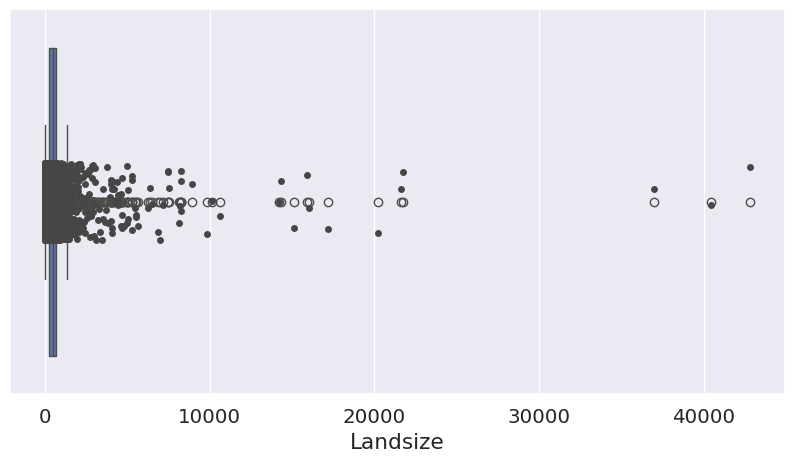

In [20]:
# check for price and landsize

sns.boxplot(x='Price', data=df_clean)
sns.stripplot(x='Price', data=df_clean, color="#474646")
plt.show()
sns.boxplot(x='Landsize', data=df_clean)
sns.stripplot(x='Landsize', data=df_clean, color="#474646")
plt.show()


In [21]:
from datasist.structdata import detect_outliers

In [22]:
numerical_cols = df_clean.select_dtypes(include=['number']).columns  # Select numerical columns
outliers_indices = detect_outliers(df_clean, 0, numerical_cols) # Apply outlier detection to numerical columns only

len(outliers_indices)

1989

In [23]:
df_clean.drop(outliers_indices, inplace=True)
df_clean

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,...,1,0,156.0,79.0,1900,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,...,2,0,134.0,150.0,1900,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,...,1,2,120.0,142.0,2014,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067,...,2,0,245.0,210.0,1910,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-10-08,2.5,3067,...,1,2,256.0,107.0,1890,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34836,Wheelers Hill,9 Walden Av,5,h,1400000.0,S,LLC,2018-02-24,16.7,3150,...,2,2,739.0,293.0,1980,Monash City Council,-37.89304,145.18475,South-Eastern Metropolitan,7392
34837,Williamstown,13 Kingshott Cl,5,h,2020000.0,S,Greg,2018-02-24,6.8,3016,...,3,2,450.0,241.0,2015,Hobsons Bay City Council,-37.86180,144.87855,Western Metropolitan,6380
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013,...,2,1,98.0,104.0,2018,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013,...,1,2,220.0,120.0,2000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543


In [26]:
#dataset shows land = zero which should be eleminated

land_size_check = (df_clean['Landsize'] < 1)
print(land_size_check.sum())


0


In [27]:
land_size_zero = df_clean['Landsize'] < 1

# Get the rows where land_size_check is True

indices_to_drop = df_clean[land_size_zero].index


# Drop rows using the indices
df_clean.drop(indices_to_drop, inplace=True)


# Recalculate land_size_check after dropping zero rows

land_size_chack = df_clean['Landsize'] < 1

print(land_size_check.sum())

0


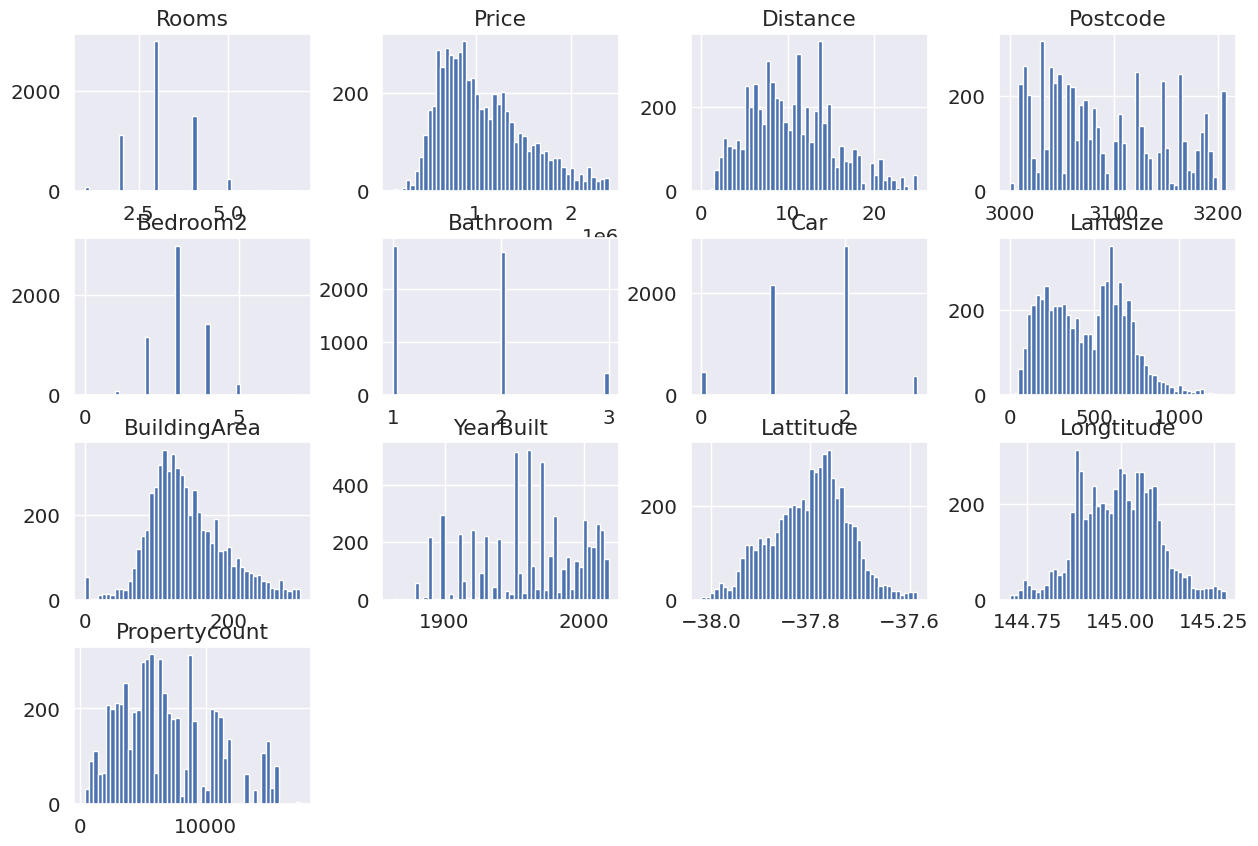

In [28]:

# Create histograms for numerical columns

numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

df_clean[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.show()


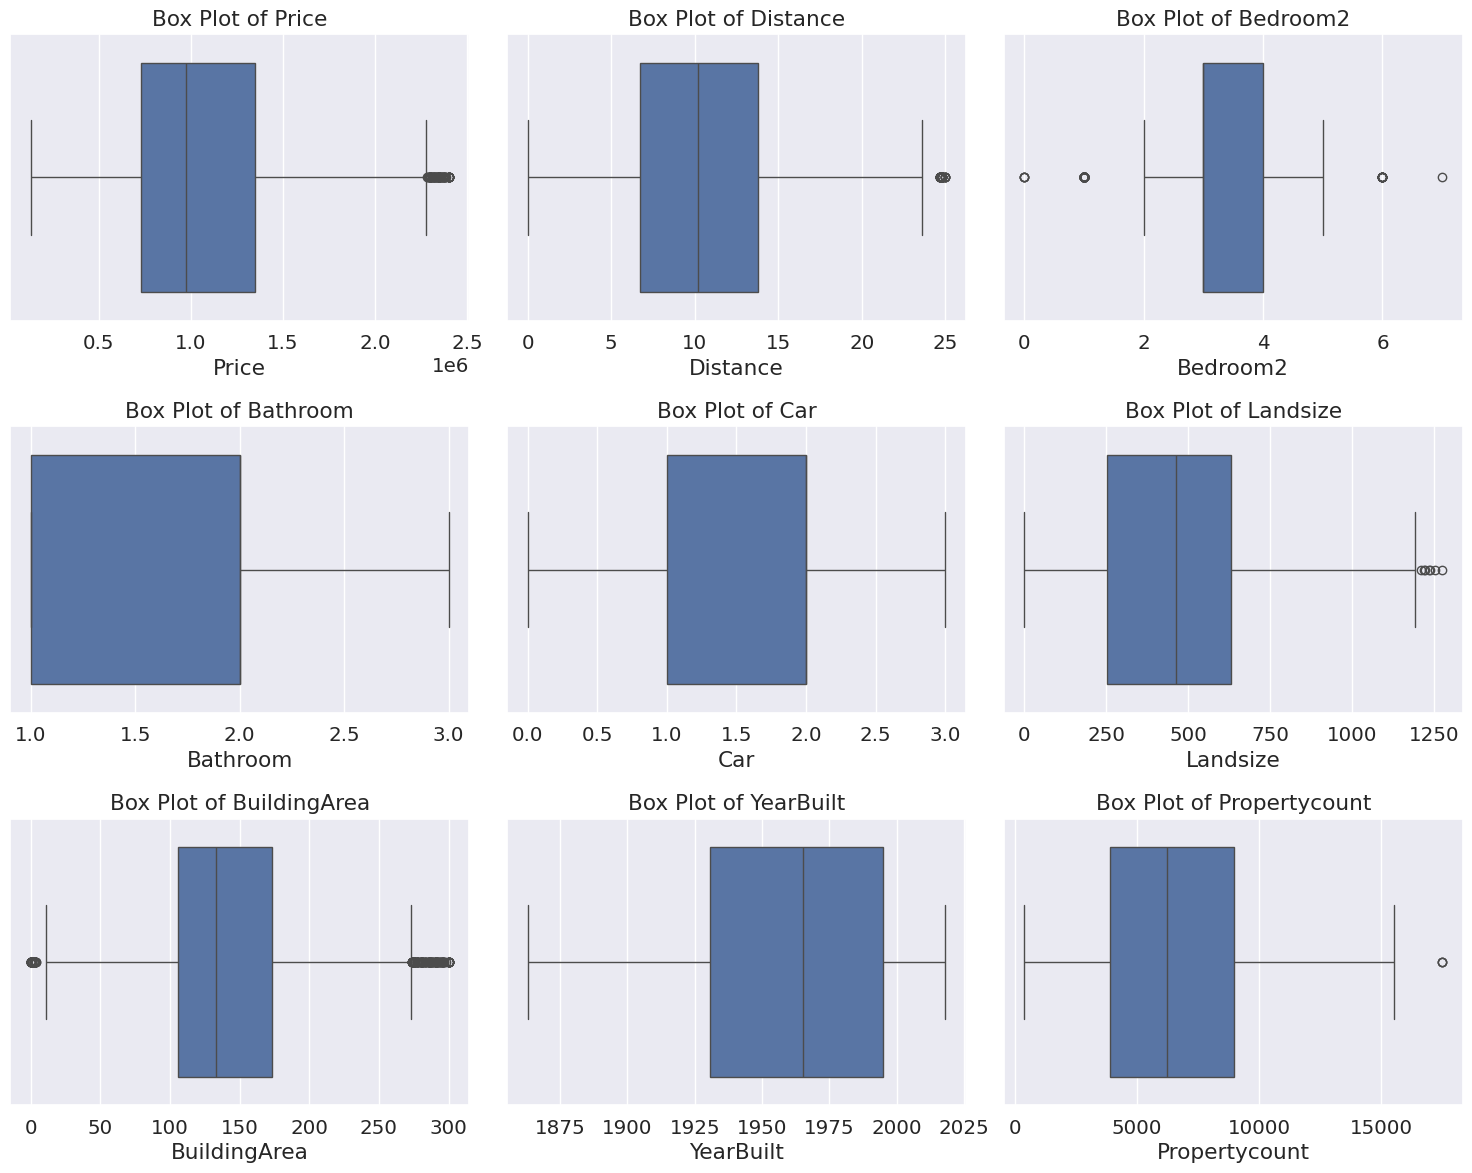

In [29]:
numerical_columns = ["Price", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize",
                     "BuildingArea", "YearBuilt", "Propertycount"]
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = df_clean[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [30]:
df_clean.describe()


,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5906.000000,5.906000e+03,5906,5906.000000,5906.0,5906.0,5906.0,5906.0,5906.000000,5906.000000,5906.0,5906.000000,5906.000000,5906.0
mean,3.124111,1.078564e+06,2017-04-04 12:49:58.984084224,10.479021,3091.068574,3.099052,1.594819,1.547579,457.831866,141.768453,1961.304605,-37.800875,144.992461,6782.267863
min,1.000000,1.310000e+05,2016-02-04 00:00:00,0.000000,3000.0,0.0,1.0,0.0,1.000000,0.000000,1863.0,-38.019080,144.703400,389.0
25%,3.000000,7.300000e+05,2016-09-24 00:00:00,6.700000,3041.0,3.0,1.0,1.0,253.000000,106.000000,1930.75,-37.853907,144.912647,3873.0
50%,3.000000,9.750000e+05,2017-05-13 00:00:00,10.200000,3076.0,3.0,2.0,2.0,462.000000,133.000000,1965.0,-37.792870,144.995800,6232.0
75%,4.000000,1.350000e+06,2017-09-16 00:00:00,13.800000,3145.0,4.0,2.0,2.0,630.000000,173.000000,1995.0,-37.748200,145.066375,8989.0
max,7.000000,2.400000e+06,2018-03-17 00:00:00,25.000000,3207.0,7.0,3.0,3.0,1274.000000,300.000000,2018.0,-37.585050,145.281360,17496.0
std,0.814769,4.517936e+05,NaN,4.913948,58.763616,0.81778,0.617745,0.727485,233.581360,53.114393,36.93451,0.077526,0.104192,3647.347661


## 3. Feature Engineering

In [31]:
#creat Distance to center vfeature

from geopy.distance import great_circle

def get_dist(x):
    loc_1 = (-37.8136, 144.9631)
    loc_2 = (x['Lattitude'], x['Longtitude'])
    return great_circle(loc_1, loc_2).kilometers

df_clean['Dist_to_center'] = df_clean.apply(get_dist, axis=1)


In [32]:
#new features
df_clean['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['SaleAge'] = df_clean['Year'] - df_clean['YearBuilt']
df_clean['SaleAge'] = df_clean['SaleAge'].clip(lower=0, upper=100)

df_clean['TotalRooms'] = df_clean['Rooms'] + df['Bedroom2']
df_clean['IsNew'] = (df_clean['YearBuilt'] >= df_clean['Year'].max() - 5).astype(int)
df_clean

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Lattitude,Longtitude,Regionname,Propertycount,Dist_to_center,Year,Month,SaleAge,TotalRooms,IsNew
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,...,-37.80790,144.99340,Northern Metropolitan,4019,2.736231,2016,2,100,4.0,0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,...,-37.80930,144.99440,Northern Metropolitan,4019,2.790897,2017,3,100,6.0,0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,...,-37.80720,144.99410,Northern Metropolitan,4019,2.814766,2016,6,2,7.0,1
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067,...,-37.80240,144.99930,Northern Metropolitan,4019,3.415390,2016,5,100,7.0,0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-10-08,2.5,3067,...,-37.80600,144.99540,Northern Metropolitan,4019,2.960714,2016,10,100,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34836,Wheelers Hill,9 Walden Av,5,h,1400000.0,S,LLC,2018-02-24,16.7,3150,...,-37.89304,145.18475,South-Eastern Metropolitan,7392,21.371354,2018,2,38,10.0,0
34837,Williamstown,13 Kingshott Cl,5,h,2020000.0,S,Greg,2018-02-24,6.8,3016,...,-37.86180,144.87855,Western Metropolitan,6380,9.157196,2018,2,3,10.0,1
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013,...,-37.81551,144.88826,Western Metropolitan,6543,6.577677,2018,2,0,4.0,1
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013,...,-37.82286,144.87856,Western Metropolitan,6543,7.497011,2018,2,18,4.0,0


## 4. Categorical Variable Encoding

In [33]:
# Encode categorical variable

from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):

    df_encoded = df_clean.copy()

    # Find categorical columns
    categorical_columns = df_clean.select_dtypes(include=['object']).columns

    # Label encode categorical columns
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df_encoded[col] = label_encoder.fit_transform(df[col].astype(str))

    return df_encoded

# Encode categorical columns
df_encoded = encode_categorical_columns(df_clean)
df_encoded


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Lattitude,Longtitude,Regionname,Propertycount,Dist_to_center,Year,Month,SaleAge,TotalRooms,IsNew
2,0,2620,2,0,1035000.0,1,18,2016-02-04,2.5,3067,...,-37.80790,144.99340,1,4019,2.736231,2016,2,100,4.0,0
4,0,4330,3,0,1465000.0,3,18,2017-03-04,2.5,3067,...,-37.80930,144.99440,1,4019,2.790897,2017,3,100,6.0,0
6,0,4654,4,0,1600000.0,4,119,2016-06-04,2.5,3067,...,-37.80720,144.99410,1,4019,2.814766,2016,6,2,7.0,1
11,0,865,3,0,1876000.0,1,119,2016-05-07,2.5,3067,...,-37.80240,144.99930,1,4019,3.415390,2016,5,100,7.0,0
14,0,5808,2,0,1636000.0,1,119,2016-10-08,2.5,3067,...,-37.80600,144.99540,1,4019,2.960714,2016,10,100,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34836,243,5711,5,0,1400000.0,1,93,2018-02-24,16.7,3150,...,-37.89304,145.18475,3,7392,21.371354,2018,2,38,10.0,0
34837,245,942,5,0,2020000.0,1,64,2018-02-24,6.8,3016,...,-37.86180,144.87855,5,6380,9.157196,2018,2,3,10.0,1
34853,249,2972,2,0,888000.0,3,167,2018-02-24,6.3,3013,...,-37.81551,144.88826,5,6543,6.577677,2018,2,0,4.0,1
34854,249,1178,2,1,705000.0,1,81,2018-02-24,6.3,3013,...,-37.82286,144.87856,5,6543,7.497011,2018,2,18,4.0,0


## 4. Numerical Feature Scaling

In [34]:

# Standard Scaling for numerical features

from sklearn.preprocessing import MinMaxScaler

df_scaled = df_encoded.select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
df_scaled

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Dist_to_center,SaleAge,TotalRooms,IsNew
2,0,2620,2,0,1035000.0,1,18,2.5,3067,2,...,1900,25,-37.80790,144.99340,1,4019,2.736231,100,4.0,0
4,0,4330,3,0,1465000.0,3,18,2.5,3067,3,...,1900,25,-37.80930,144.99440,1,4019,2.790897,100,6.0,0
6,0,4654,4,0,1600000.0,4,119,2.5,3067,3,...,2014,25,-37.80720,144.99410,1,4019,2.814766,2,7.0,1
11,0,865,3,0,1876000.0,1,119,2.5,3067,4,...,1910,25,-37.80240,144.99930,1,4019,3.415390,100,7.0,0
14,0,5808,2,0,1636000.0,1,119,2.5,3067,2,...,1890,25,-37.80600,144.99540,1,4019,2.960714,100,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34836,243,5711,5,0,1400000.0,1,93,16.7,3150,5,...,1980,16,-37.89304,145.18475,3,7392,21.371354,38,10.0,0
34837,245,942,5,0,2020000.0,1,64,6.8,3016,5,...,2015,7,-37.86180,144.87855,5,6380,9.157196,3,10.0,1
34853,249,2972,2,0,888000.0,3,167,6.3,3013,2,...,2018,12,-37.81551,144.88826,5,6543,6.577677,0,4.0,1
34854,249,1178,2,1,705000.0,1,81,6.3,3013,2,...,2000,12,-37.82286,144.87856,5,6543,7.497011,18,4.0,0


## 6. Univariate Analysis


Descriptive Statistics (Unscaled):
             Rooms         Price     Distance     Postcode  Bathroom  \
count  5906.000000  5.906000e+03  5906.000000       5906.0    5906.0   
mean      3.124111  1.078564e+06    10.479021  3091.068574  1.594819   
std       0.814769  4.517936e+05     4.913948    58.763616  0.617745   
min       1.000000  1.310000e+05     0.000000       3000.0       1.0   
25%       3.000000  7.300000e+05     6.700000       3041.0       1.0   
50%       3.000000  9.750000e+05    10.200000       3076.0       2.0   
75%       4.000000  1.350000e+06    13.800000       3145.0       2.0   
max       7.000000  2.400000e+06    25.000000       3207.0       3.0   

            Car     Landsize  Propertycount         Year        Month  
count    5906.0  5906.000000         5906.0  5906.000000  5906.000000  
mean   1.547579   457.831866    6782.267863  2016.722486     6.948866  
std    0.727485   233.581360    3647.347661     0.661530     3.029926  
min         0.0     1.00000

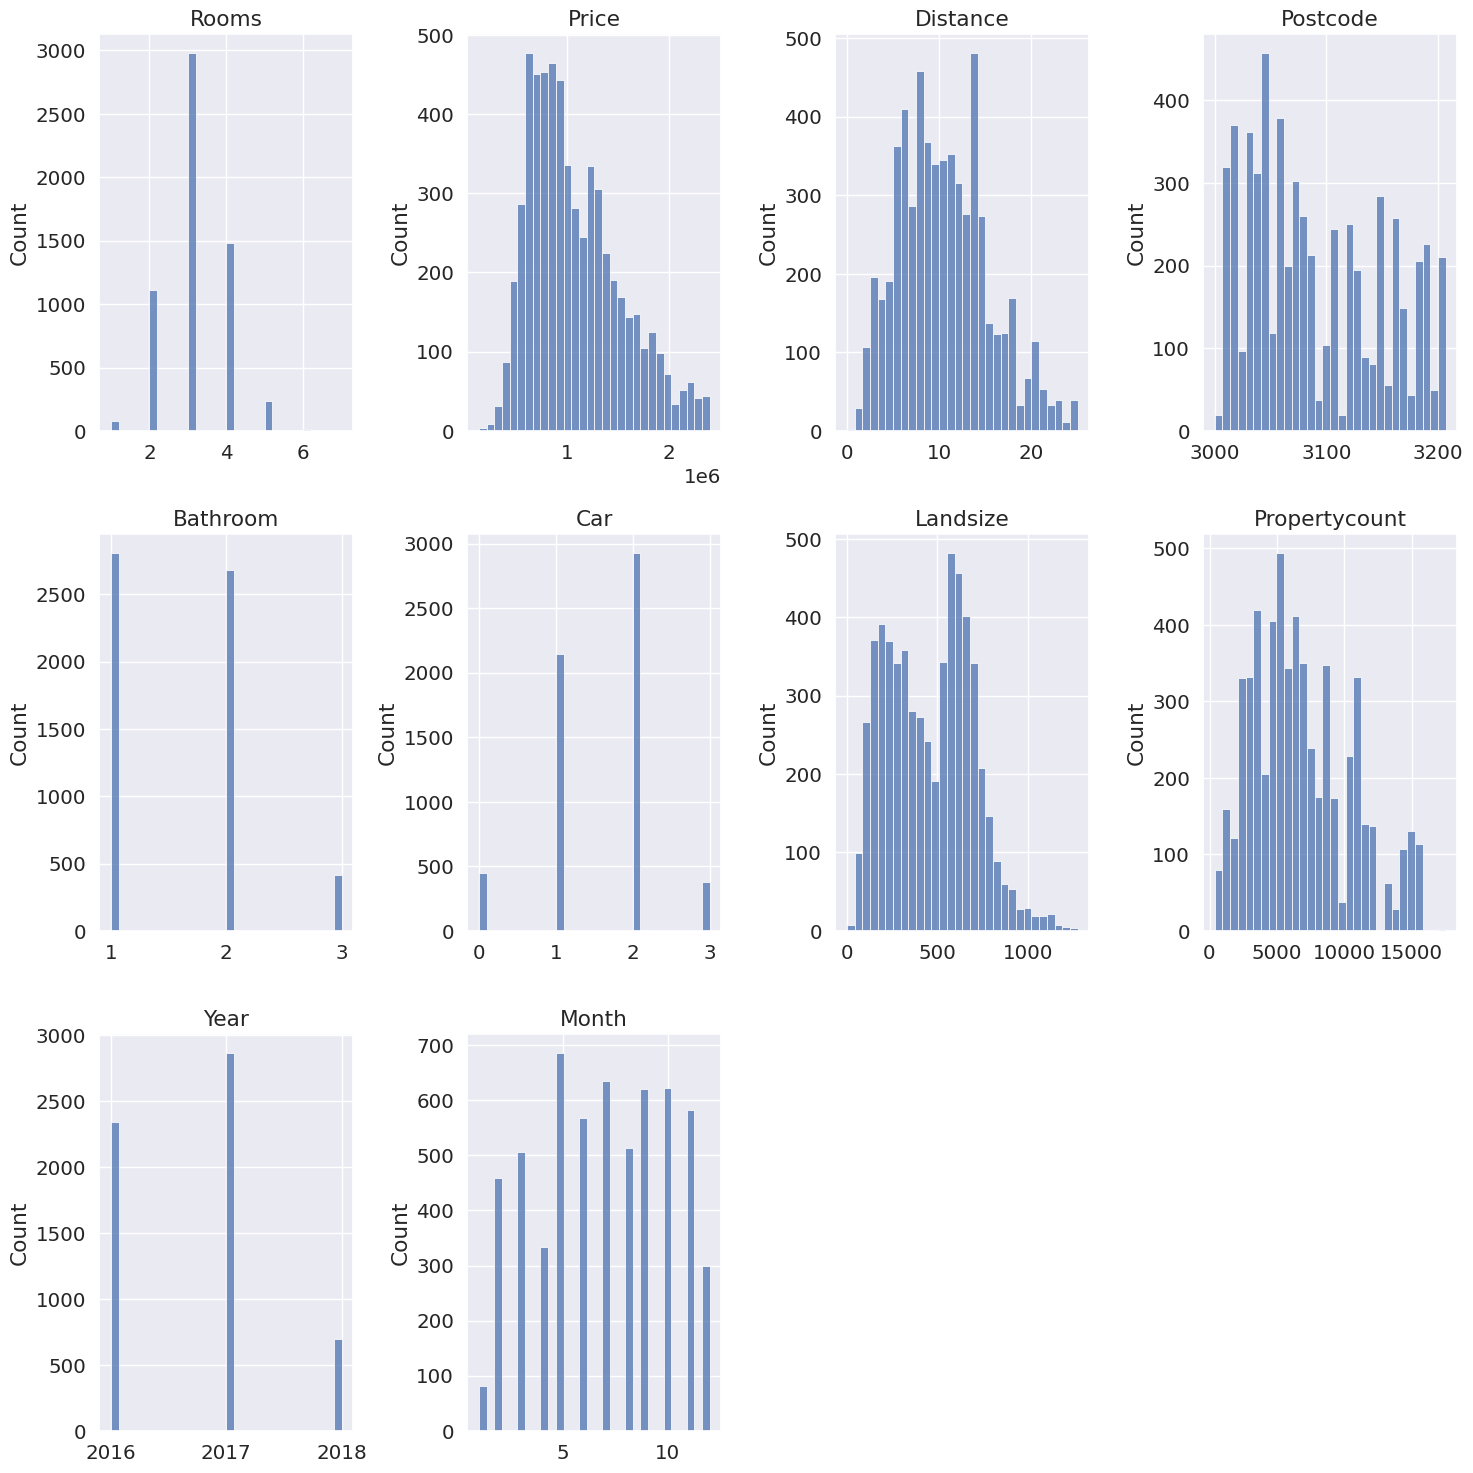

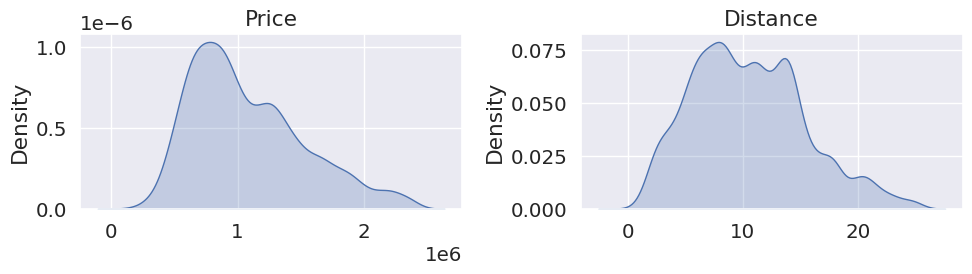

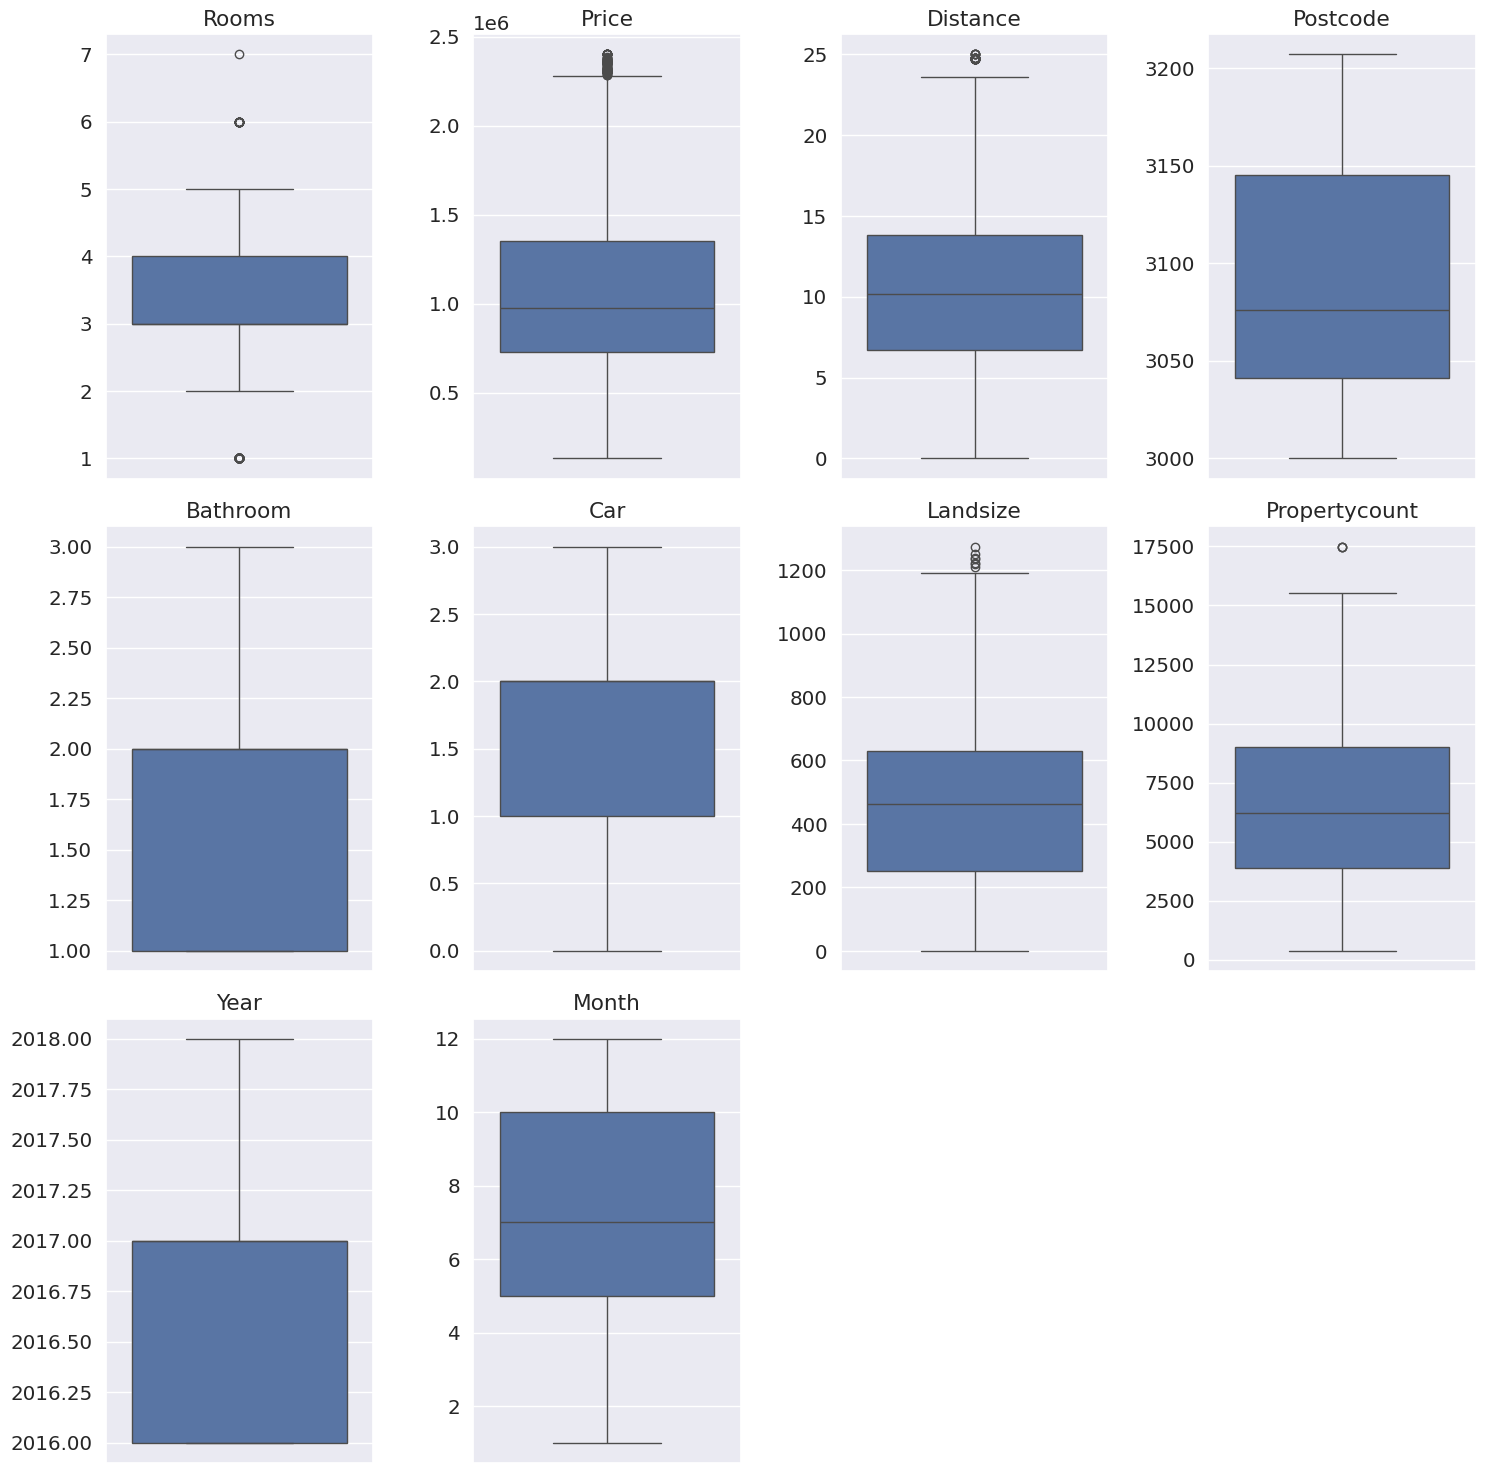

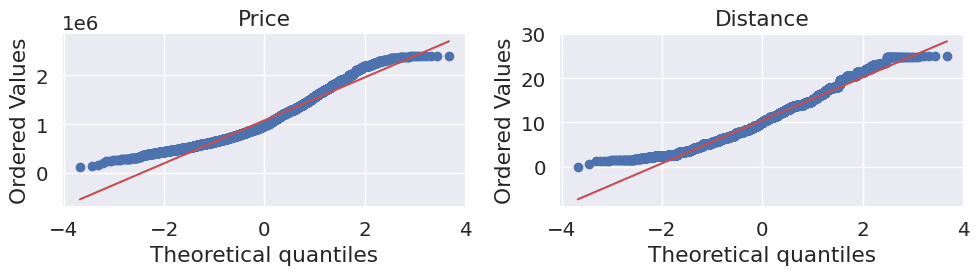

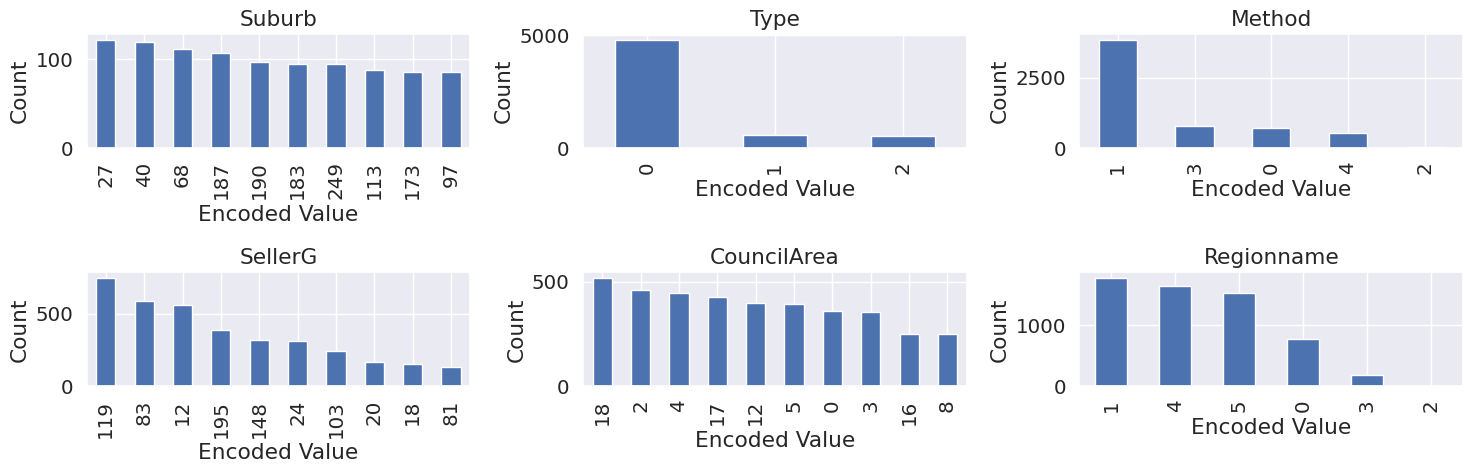

In [35]:

df_encoded_2 = df_encoded.copy()

# Update numerical and continuous columns

numerical_cols = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car',
                  'Landsize', 'Propertycount', 'Year', 'Month', 'DistanceToCBD']

continuous_cols = ['Price', 'Distance', 'DistanceToCBD']

categorical_cols = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']


# Filter existing columns

numerical_cols = [col for col in numerical_cols if col in df_encoded_2.columns]
continuous_cols = [col for col in continuous_cols if col in df_encoded_2.columns]
categorical_cols = [col for col in categorical_cols if col in df_encoded_2.columns]


#Descriptive Statistics

print("\nDescriptive Statistics (Unscaled):")
print(df_encoded_2[numerical_cols].describe())


#Skewness and Kurtosis
stats = pd.DataFrame({'Skewness': df_encoded_2[numerical_cols].apply(skew, nan_policy='omit'),
    'Kurtosis': df_encoded_2[numerical_cols].apply(kurtosis, nan_policy='omit')})

print("\nSkewness and Kurtosis:")
print(stats)



# Histograms for Numerical Columns

n_cols = 4
n_rows = int(np.ceil(len(numerical_cols) / n_cols))
plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_encoded_2[col], bins=30, kde=False)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()

plt.show()

# KDE for Continuous Columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df_encoded_2[col], fill=True, warn_singular=False)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()

plt.show()


#Box Plots for Numerical Columns

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_encoded_2[col])
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Q-Q Plots for Continuous Columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    probplot(df_encoded_2[col], dist="norm", plot=plt)
    plt.title(col)
plt.tight_layout()
plt.show()



#Categorical Distribution
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    df_encoded_2[col].value_counts().head(10).plot(kind='bar')
    plt.title(col)
    plt.xlabel('Encoded Value')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 7. Bivariate Analysis

<Axes: >

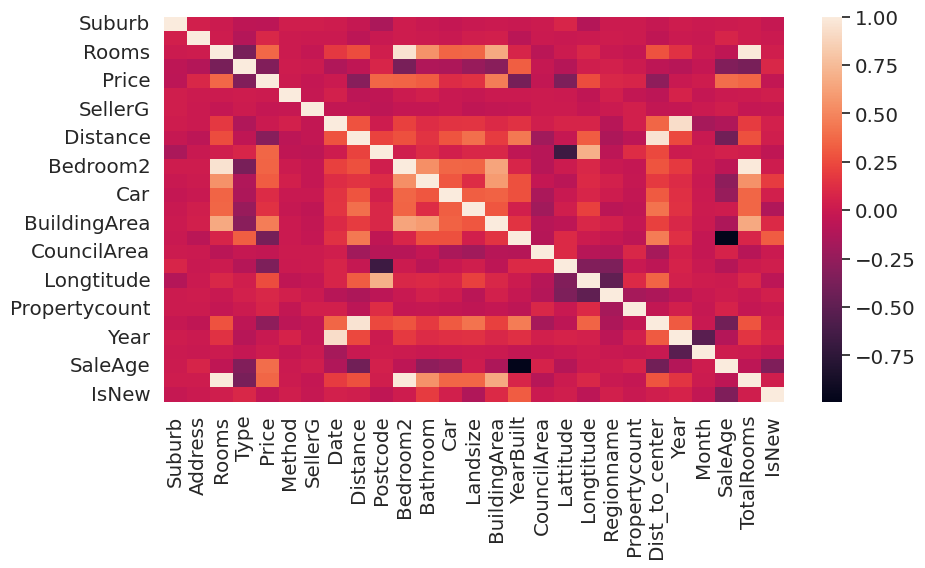

In [36]:
# Correlation Heatmap full

sns.heatmap(round(df_encoded.corr(),2), annot=False)

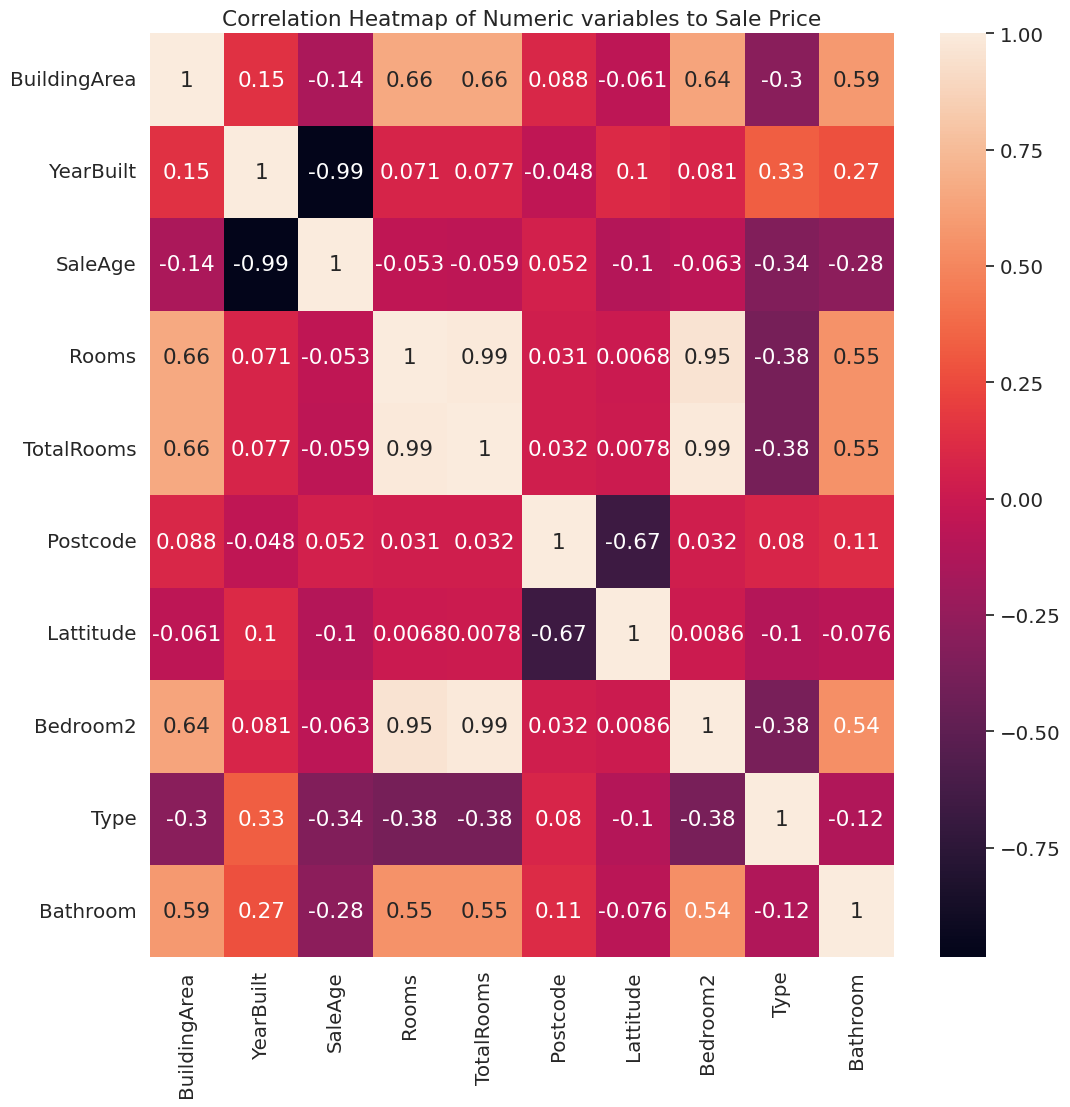

In [37]:
# Correlation Heatmap for top 10 correlated variables


numeric_columns_encoded = df_encoded.select_dtypes(include=['int64', 'float64']).columns


correlation_matrix =df_encoded[numeric_columns_encoded].corr()

price_correlations = correlation_matrix['Price'].abs().sort_values(ascending=False)

# Select the top correlated variables
N = 10
top_corr_variables = price_correlations[1:N+1].index
plt.figure(figsize=(12, 12))
sns.heatmap(df_encoded[top_corr_variables].corr(), annot=True)
plt.title('Correlation Heatmap of Numeric variables to Sale Price')

plt.show()


In [38]:
# ANOVA Test for Categorical Variables vs Price

from scipy import stats

def anova_test(df_clean, categorical_col, numerical_col='Price'):
    categories = df_clean[categorical_col].unique()
    category_groups = [df_clean[df_clean[categorical_col] == cat][numerical_col].dropna() for cat in categories]

    f_statistic, p_value = stats.f_oneway(*category_groups)

    print(f"ANOVA Test: {categorical_col} vs {numerical_col}")
    print(f"F-statistic: {f_statistic}")
    print(f"p-value: {p_value}")
    print("Significant difference" if p_value < 0.05 else "No significant difference")
    print("\n")




categorical_columns = ['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname']
for col in categorical_columns:
    anova_test(df_clean, col)

ANOVA Test: Suburb vs Price
F-statistic: 21.61283654108328
p-value: 0.0
Significant difference


ANOVA Test: Type vs Price
F-statistic: 395.28061857286633
p-value: 7.833809257336796e-162
Significant difference


ANOVA Test: Method vs Price
F-statistic: 20.74000399226158
p-value: 5.409811369373492e-17
Significant difference


ANOVA Test: CouncilArea vs Price
F-statistic: 118.6614988052367
p-value: 0.0
Significant difference


ANOVA Test: Regionname vs Price
F-statistic: 276.0898182728969
p-value: 4.425311815199566e-266
Significant difference




## **8- visualizations**

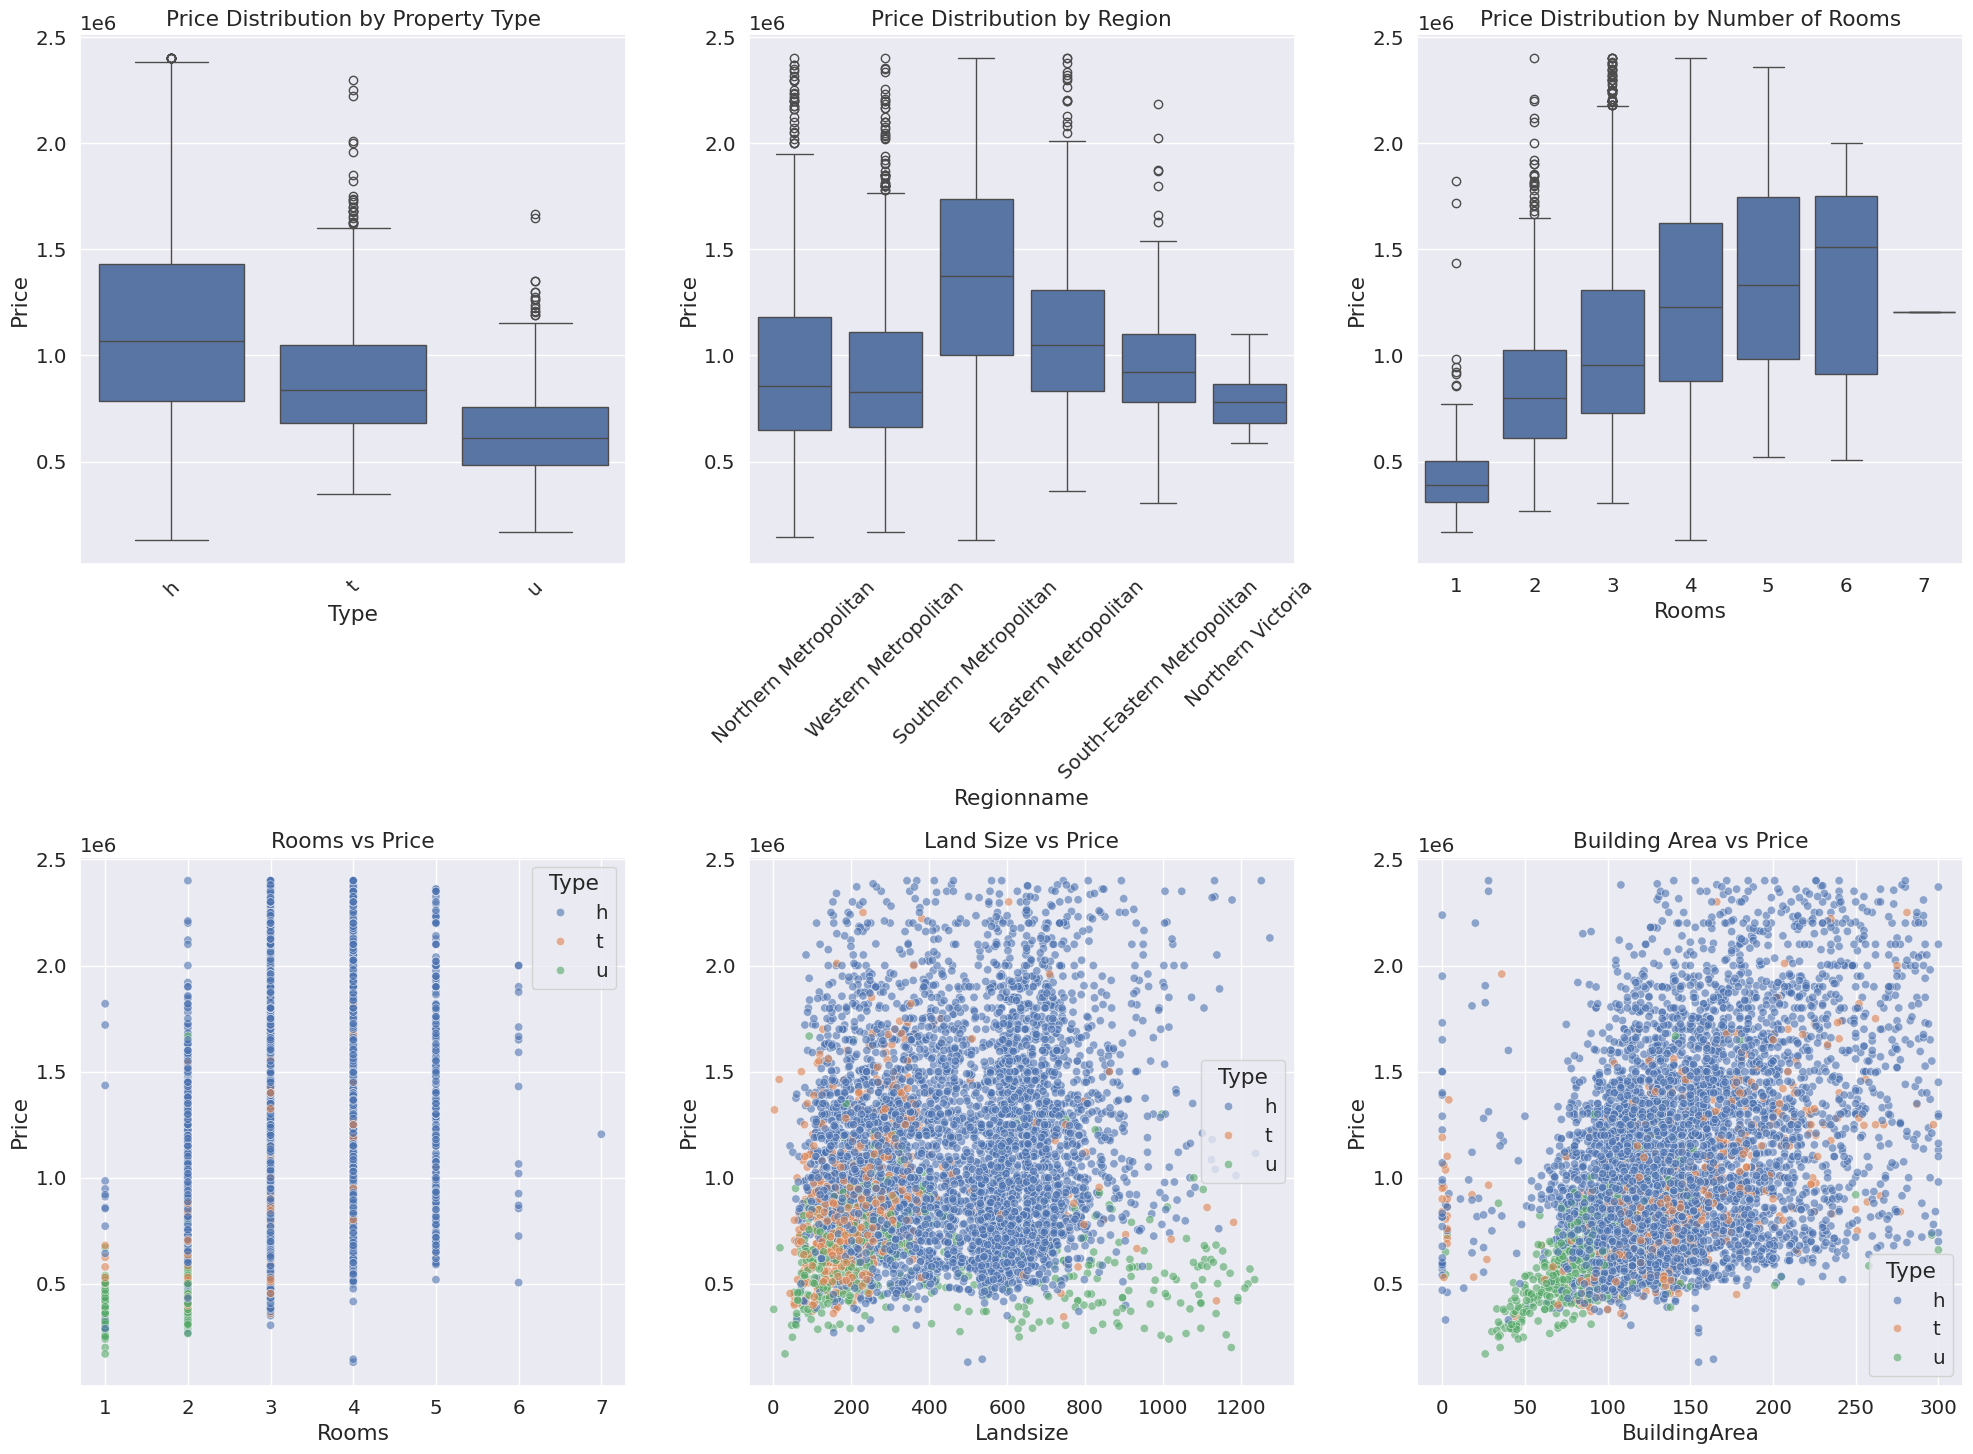

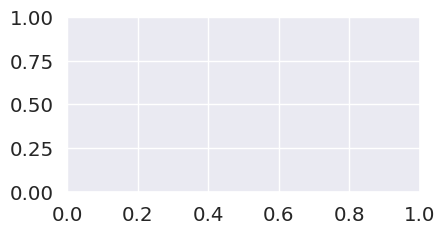

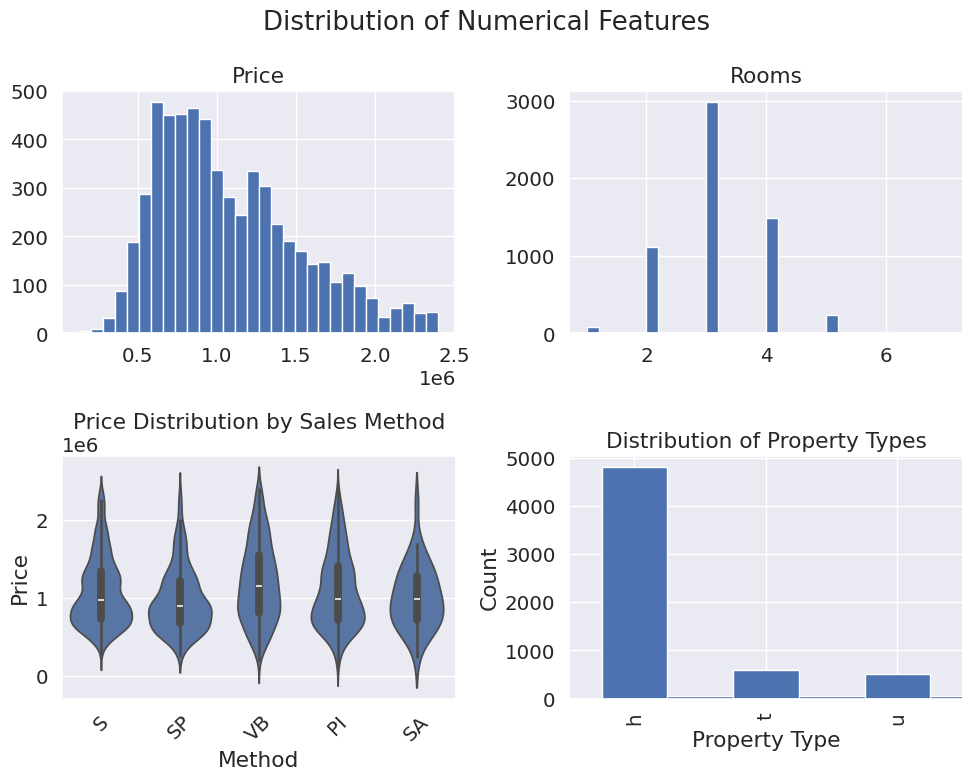

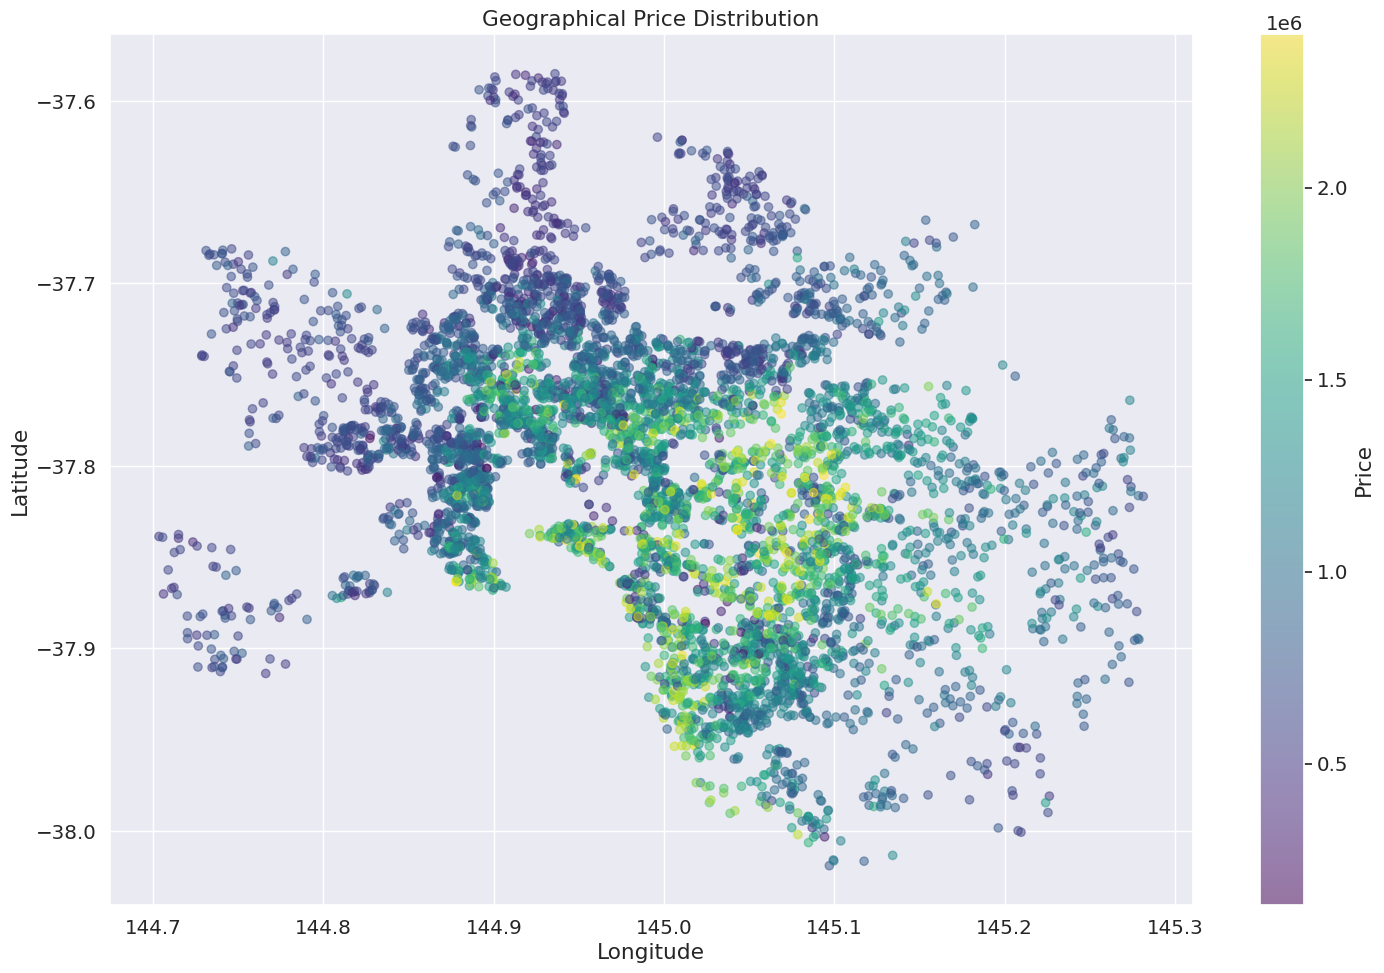

In [39]:
#Price Distribution Visualizations

plt.figure(figsize=(20, 15))

# Price Distribution by Property Type

plt.subplot(2, 3, 1)
sns.boxplot(x='Type', y='Price', data=df_clean)
plt.title('Price Distribution by Property Type')

plt.xticks(rotation=45)


# Price Distribution by Region

plt.subplot(2, 3, 2)
sns.boxplot(x='Regionname', y='Price', data=df_clean)
plt.title('Price Distribution by Region')
plt.xticks(rotation=45)


# Price Distribution by Rooms

plt.subplot(2, 3, 3)
sns.boxplot(x='Rooms', y='Price', data=df_clean)
plt.title('Price Distribution by Number of Rooms')


# Rooms vs Price Scatter
plt.subplot(2, 3, 4)
sns.scatterplot(x='Rooms', y='Price', hue='Type', data=df_clean, alpha=0.6)
plt.title('Rooms vs Price')


# Land Size vs Price
plt.subplot(2, 3, 5)
sns.scatterplot(x='Landsize', y='Price', hue='Type', data=df_clean, alpha=0.6)
plt.title('Land Size vs Price')



# Building Area vs Price
plt.subplot(2, 3, 6)
sns.scatterplot(x='BuildingArea', y='Price', hue='Type', data=df_clean, alpha=0.6)
plt.title('Building Area vs Price')

plt.tight_layout()
plt.show()



# Histogram of Numerical Features
plt.subplot(2, 2, 2)
numerical_features = ['Price', 'Rooms', 'Landsize', 'BuildingArea']
df_clean[numerical_features].hist(bins=30, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')



# Violin Plot of Price by Method
plt.subplot(2, 2, 3)
sns.violinplot(x='Method', y='Price', data=df_clean)
plt.title('Price Distribution by Sales Method')
plt.xticks(rotation=45)



# Categorical Feature Distribution
plt.subplot(2, 2, 4)
df_clean['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



# Geographical Visualization
plt.figure(figsize=(15, 10))
plt.scatter(df_clean['Longtitude'], df_clean['Lattitude'],
                c=df_clean['Price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price')
plt.title('Geographical Price Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

## 9. Key Conclusions and Insights

1. Factors affecting House Prices


Size and Quality:

Larger house get higher sale prices as larger areas are assumed to be more valuable.

Overall quality of the house is a critical consideration in pricing, and high-standard houses attract premium prices.


Location:

Suburb: ANOVA indicates a significant price difference across suburbs (F = 21.61, p ≈ 0.0), confirming a strong effect of neighborhoods on house prices due to local amenities, prestige, or relative appeal.

Council Area: Differentiated price levels (F = 118.66, p ≈ 0.0) across council areas may signal the influence of local governance and infrastructure or regulations on land values.

Regions: Regional differences, despite broad (F = 276.09, p ≈ 4.43e-266), emphasize the influence of location, perhaps Southern Metropolitan can achieve higher prices due to proximity to the city or favorable attributes.



Type of Property:

ANOVA results (F = 395.28, p ≈ 7.83e-162) show significant price differences across property types (house vs. unit vs. townhouse). Houses, generally priced higher than units and townhouses, point to buyer favor for this type of properties.

Method of Sale:
Prices are affected significantly by the methode of sale (F = 20.74, p ≈ 5.41e-17). The competitive nature of sales via auction (S) leads possibly to higher price realizations than vendor bids (VB) or properties that have been passed in (PI), reflecting a functional market.


Age and Construction:

Year built influences the value under consideration, newer houses on average being marketed higher maybe because of their designs and considerably good condition.

Perceived value of items such as dock barge garages how many cars, large added capacity tends to keep prices of that nature up.


2. Insights About Pricing

Price Range: Most houses from the dataset were sold between $100000 and $200000.


Price Variation-There is considerable price variation even for similar property types determined by location (suburb, council area, region) type and method of sale confirmed by ANOVA.


3. Suggestions

Property Valuation:

Focus assessments on total living area and overall quality since they are major drivers of price.
as confirmed by ANOVA results, incorporate these location-interested factors (suburb, council area, region) into the pricing models.

Evaluation of property type and sale method would be factors that affect buyer behavior and final sale prices.


Pricing Models:

Development of various pricing models able to recognize the interactions between the features in order to address the caused price variation.

Statistical tests, such as ANOVA for identification of key categorical predictor for better price prediction.
